In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import plotly.express as px

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:
df = pd.read_excel("C:/Users/seled/OneDrive/Desktop/DSC680/soil.xlsx", index_col=None)

In [4]:
#create category
cats = ["BlackMeasles", "BlackRot", "HealthyGrapes", "LeafBlight"]
#path to files
base_path = "C:/Users/selena.c.mcquerrey/OneDrive - US Army/Desktop/jupyter/grapes.zip"


In [5]:
#storage
processed_images = []
labels = []
for label, category in enumerate(cats):
    folder_path = os.path.join(base_path, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).resize((128, 128))  # Resize all images to 128x128
            processed_images.append(np.array(img) / 255.0)  # Normalize to [0, 1]
            labels.append(label)  # Assign numeric labels
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

processed_images = np.array(processed_images)  # Convert to NumPy array
labels = np.array(labels)

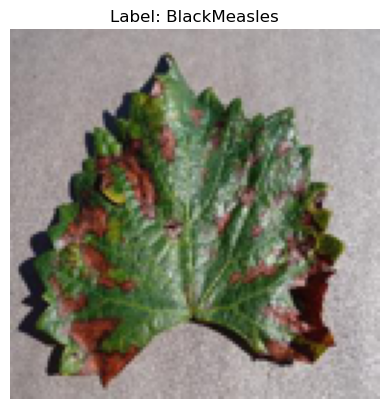

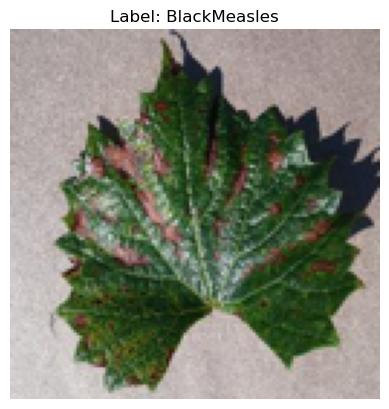

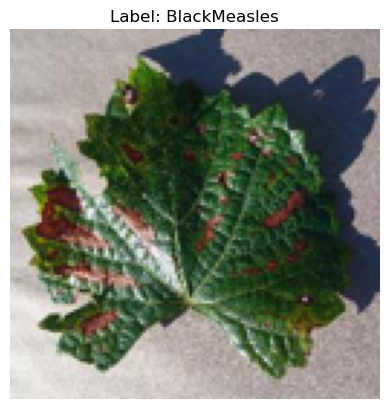

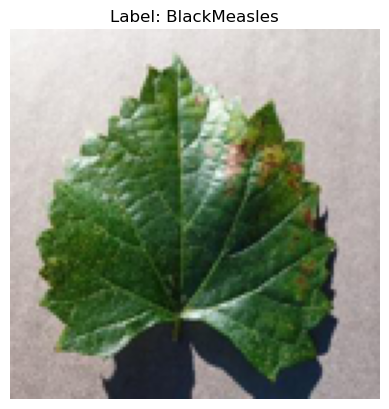

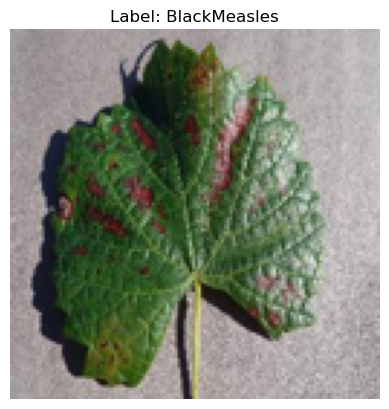

In [6]:
#storage
processed_images = []
labels = []
for label, category in enumerate(cats):
    folder_path = os.path.join(base_path, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).resize((128, 128))  # Resize all images to 128x128
            processed_images.append(np.array(img) / 255.0)  # Normalize to [0, 1]
            labels.append(label)  # Assign numeric labels
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

processed_images = np.array(processed_images)  # Convert to NumPy array
labels = np.array(labels)

In [7]:
np.save("processed_image.npy", processed_images)
np.save("labels.npy", labels)

In [8]:
# Load the data with `allow_pickle=True`
processed_images = np.load("processed_image.npy", allow_pickle=True)
labels = np.load("labels.npy", allow_pickle=True)

# Check the shapes to ensure data loaded correctly
print(f"Processed images shape: {processed_images.shape}")
print(f"Labels shape: {labels.shape}")

Processed images shape: (1600, 128, 128, 3)
Labels shape: (1600,)


In [9]:
#encode labels
label_encode = LabelEncoder()
labels_encoded = label_encode.fit_transform(labels)
#save
class_names = label_encode.classes_
print(f"Class names: {class_names}")

Class names: [0 1 2 3]


In [10]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    processed_images, labels_encoded, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")

# Verify data integrity
print(f"First label: {labels[0]}")

Training samples: 1280
Validation samples: 320
First label: 0


In [11]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\seled\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,948 (49.36 MB)

 Trainable params: 12,938,948 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

conv2d - spatial features, maxpooling2d - downsample to reduce omputational load,
flatten - 3D to 1D vector, dense - concat for final classify,\l

In [13]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.4693 - loss: 1.2581 - val_accuracy: 0.8062 - val_loss: 0.4030
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 318ms/step - accuracy: 0.8338 - loss: 0.4141 - val_accuracy: 0.7437 - val_loss: 0.5176
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.8830 - loss: 0.2870 - val_accuracy: 0.8687 - val_loss: 0.3045
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 315ms/step - accuracy: 0.9487 - loss: 0.1861 - val_accuracy: 0.8625 - val_loss: 0.3687
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step - accuracy: 0.9637 - loss: 0.1089 - val_accuracy: 0.9094 - val_loss: 0.2340
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - accuracy: 0.9730 - loss: 0.0840 - val_accuracy: 0.8781 - val_loss: 0.3247
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.9690 - loss: 0.0991 - val_accuracy: 0.9219 - val_loss: 0.2837
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.9919 - loss: 0.0292 - val_accu

In [14]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8997 - loss: 0.3950
Validation Loss: 0.3537196218967438
Validation Accuracy: 0.893750011920929


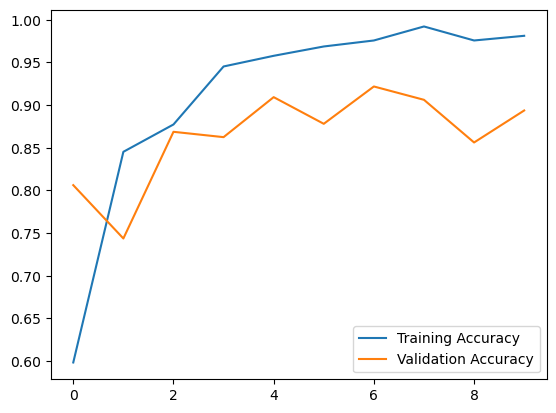

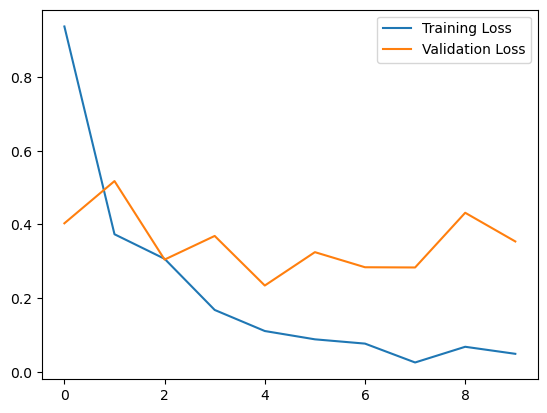

In [15]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Establishing parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model using augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)


Epoch 1/10


C:\Users\seled\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 329ms/step - accuracy: 0.7042 - loss: 0.8494 - val_accuracy: 0.9031 - val_loss: 0.3203
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.7531 - loss: 0.5678 - val_accuracy: 0.8875 - val_loss: 0.3354
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - accuracy: 0.7870 - loss: 0.4985 - val_accuracy: 0.8781 - val_loss: 0.2880
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 332ms/step - accuracy: 0.8285 - loss: 0.3876 - val_accuracy: 0.9156 - val_loss: 0.2019
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 336ms/step - accuracy: 0.8664 - loss: 0.3471 - val_accuracy: 0.9000 - val_loss: 0.2488
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 329ms/step - accuracy: 0.8872 - loss: 0.3029 - val_accuracy: 0.9094 - val_loss: 0.2207
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 324ms/step - accuracy: 0.8989 - loss: 0.2805 - val_accuracy: 0.9000 - val_loss: 0.2108
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 320ms/step - accuracy: 0.8791 - loss: 0.2973 - val_accuracy: 0.903

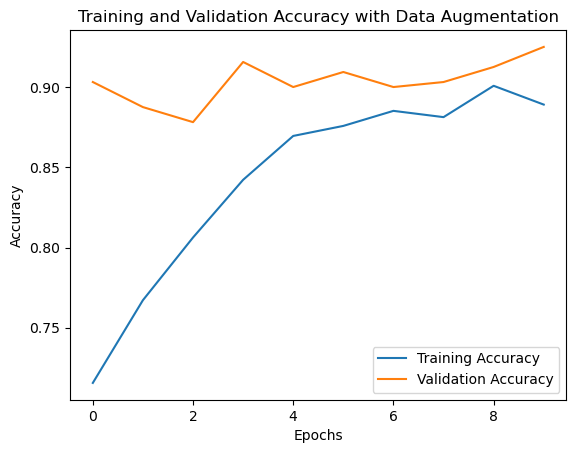

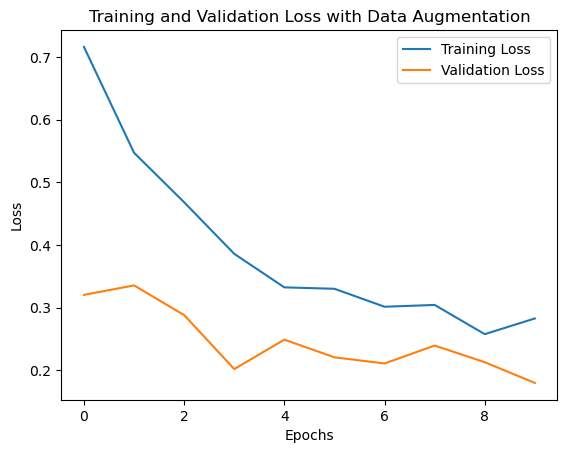

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("grapevine_model.h5")

In [4]:
df

LAT    LON  YEAR  DOY     T2M    QV2M  PRECTOTCORR  GWETTOP  GWETROOT  \
0     36.75 -79.75  2023  334    3.60    3.34          0.0     0.56      0.58   
1     36.75 -79.25  2023  334    3.66    3.36          0.0     0.57      0.59   
2     36.75 -78.75  2023  334    3.51    3.36          0.0     0.60      0.61   
3     36.75 -78.25  2023  334    3.50    3.43          0.0     0.61      0.63   
4     36.75 -77.75  2023  334    3.79    3.45          0.0     0.61      0.63   
...     ...    ...   ...  ...     ...     ...          ...      ...       ...   
9145  38.75 -79.75  2024  334 -999.00 -999.00       -999.0  -999.00   -999.00   
9146  38.75 -79.25  2024  334 -999.00 -999.00       -999.0  -999.00   -999.00   
9147  38.75 -78.75  2024  334 -999.00 -999.00       -999.0  -999.00   -999.00   
9148  38.75 -78.25  2024  334 -999.00 -999.00       -999.0  -999.00   -999.00   
9149  38.75 -77.75  2024  334 -999.00 -999.00       -999.0  -999.00   -999.00   

      GWETPROF  ALLSKY_SFC_UV_INDEX  
0         0.57                 0.45  
1         0.58                 0.45  
2         0.60                 0.45  
3         0.62                 0.45  
4         0.62                 0.44  
...        ...                  ...  
9145   -999.00              -999.00  
9146   -999.00              -999.00  
9147   -999.00              -999.00  
9148   -999.00              -999.00  
9149   -999.00              -999.00  

[9150 rows x 11 columns]

In [5]:
# Removing Null values 
df.replace(-999, 0, inplace=True)


In [7]:
# Columns to check for zeros 
columns_to_check = ['T2M', 'QV2M', 'PRECTOTCORR', 'GWETTOP', 'GWETROOT', 'GWETPROF', 'ALLSKY_SFC_UV_INDEX'] 
# Remove rows with value of 0 
df = df[~(df[columns_to_check] == 0).all(axis=1)]

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df

LAT    LON  YEAR  DOY   T2M  QV2M  PRECTOTCORR  GWETTOP  GWETROOT  \
0     36.75 -79.75  2023  334  3.60  3.34         0.00     0.56      0.58   
1     36.75 -79.25  2023  334  3.66  3.36         0.00     0.57      0.59   
2     36.75 -78.75  2023  334  3.51  3.36         0.00     0.60      0.61   
3     36.75 -78.25  2023  334  3.50  3.43         0.00     0.61      0.63   
4     36.75 -77.75  2023  334  3.79  3.45         0.00     0.61      0.63   
...     ...    ...   ...  ...   ...   ...          ...      ...       ...   
9020  38.75 -79.75  2024  332  2.72  3.62         1.57     0.00      0.00   
9021  38.75 -79.25  2024  332  3.00  3.63         0.99     0.00      0.00   
9022  38.75 -78.75  2024  332  3.64  3.75         0.31     0.00      0.00   
9023  38.75 -78.25  2024  332  4.32  3.92         0.18     0.00      0.00   
9024  38.75 -77.75  2024  332  5.03  4.11         0.07     0.00      0.00   

      GWETPROF  ALLSKY_SFC_UV_INDEX  
0         0.57                 0.45  
1         0.58                 0.45  
2         0.60                 0.45  
3         0.62                 0.45  
4         0.62                 0.44  
...        ...                  ...  
9020      0.00                 0.00  
9021      0.00                 0.00  
9022      0.00                 0.00  
9023      0.00                 0.00  
9024      0.00                 0.00  

[9025 rows x 11 columns]

In [10]:
# Define temperature categories
conditions = [
    (df['T2M'] >= 0) & (df['T2M'] <= 7.19),
    (df['T2M'] > 7.19) & (df['T2M'] <= 14.39),
    (df['T2M'] > 14.39) & (df['T2M'] <= 21.56)
]
choices = ['Low', 'Medium', 'High']
df['Temperature_Level'] = pd.cut(df['T2M'], bins=[0, 7.19, 14.39, 21.56], labels=choices)



C:\Users\seled\AppData\Local\Temp\ipykernel_13308\49159477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature_Level'] = pd.cut(df['T2M'], bins=[0, 7.19, 14.39, 21.56], labels=choices)


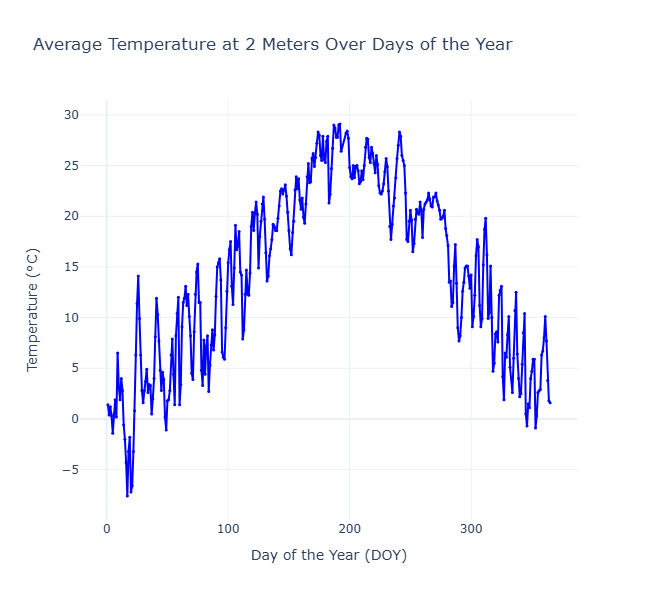

In [11]:
import plotly.graph_objects as go
from scipy.ndimage import uniform_filter1d

# Average temperature by day
df_avg = df.groupby('DOY', as_index=False).agg({'T2M': 'mean'})

# Round the temperature values
df_avg['T2M'] = df_avg['T2M'].round(1)

# Interactive time series plot
fig_time_series = go.Figure()

# Adding trace with lines and smaller markers
fig_time_series.add_trace(go.Scatter(
    x=df_avg['DOY'],
    y=df_avg['T2M'],
    mode='lines+markers',
    line=dict(color='blue', width=2),
    marker=dict(color='blue', size=3),
    name='Average Temperature (T2M)'
))

# Adjusting parameters
fig_time_series.update_layout(
    title='Average Temperature at 2 Meters Over Days of the Year',
    xaxis_title='Day of the Year (DOY)',
    yaxis_title='Temperature (°C)',
    hovermode='x',
    template='plotly_white',
    autosize=False,
    width=1200, 
    height=600   
)

fig_time_series.show()


C:\Users\seled\AppData\Local\Temp\ipykernel_13308\2461198059.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



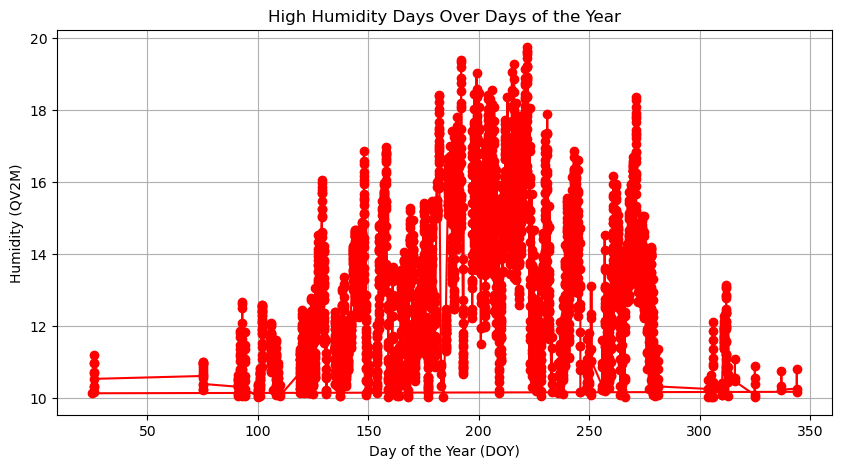

In [12]:
# Humidity categories
conditions = [
    (df['QV2M'] <= 5),
    (df['QV2M'] > 5) & (df['QV2M'] <= 10),
    (df['QV2M'] > 10)
]
choices = ['Low', 'Medium', 'High']
df['Humidity_Level'] = pd.cut(df['QV2M'], bins=[0, 5, 10, float('inf')], labels=choices)

# Filter
high_humidity_df = df[df['Humidity_Level'] == 'High']

# Plot
plt.figure(figsize=(10,5))
plt.plot(high_humidity_df['DOY'], high_humidity_df['QV2M'], marker='o', linestyle='-', color='red')
plt.xlabel('Day of the Year (DOY)')
plt.ylabel('Humidity (QV2M)')
plt.title('High Humidity Days Over Days of the Year')
plt.grid(True)
plt.show()


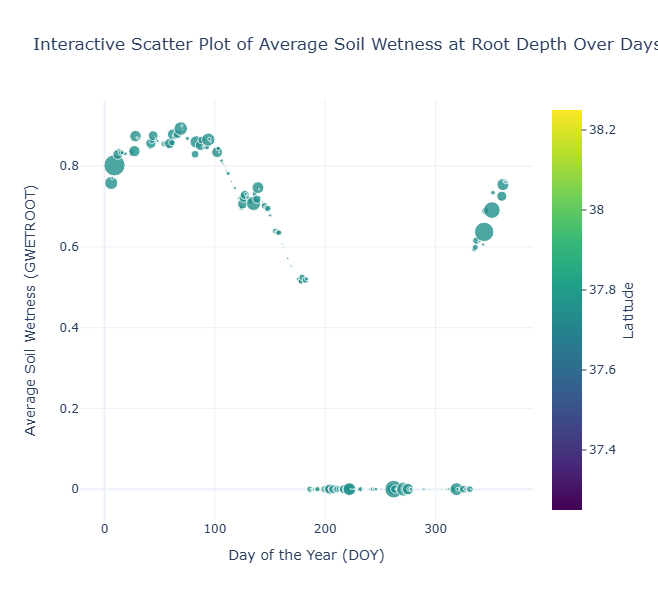

In [13]:
# Average soil wetness by day
df_avg = df.groupby('DOY', as_index=False).agg({'GWETROOT': 'mean', 'LAT': 'mean', 'LON': 'mean', 'T2M': 'mean', 'QV2M': 'mean', 'PRECTOTCORR': 'mean'})

# interactive scatter plot
fig = px.scatter(df_avg, x='DOY', y='GWETROOT',
                 title='Interactive Scatter Plot of Average Soil Wetness at Root Depth Over Days of the Year',
                 labels={'DOY': 'Day of the Year (DOY)', 'GWETROOT': 'Average Soil Wetness (GWETROOT)'},
                 hover_data=['LAT', 'LON', 'T2M', 'QV2M'],
                 color='LAT', 
                 size='PRECTOTCORR', 
                 size_max=15, 
                 color_continuous_scale=px.colors.sequential.Viridis)  

fig.update_traces(marker=dict(opacity=0.8), selector=dict(mode='markers'))

# Plot parameters
fig.update_layout(
    title='Interactive Scatter Plot of Average Soil Wetness at Root Depth Over Days of the Year',
    xaxis_title='Day of the Year (DOY)',
    yaxis_title='Average Soil Wetness (GWETROOT)',
    hovermode='closest',
    template='plotly_white',
    autosize=False,
    width=1200, 
    height=600, 
    coloraxis_colorbar=dict(
        title="Latitude",
        titleside="right",
        titlefont=dict(size=14),
        tickmode="auto",
        ticks="outside"
    )
)

fig.show()


In [14]:
X = df[['LAT', 'LON', 'DOY', 'T2M', 'PRECTOTCORR', 'GWETTOP', 'GWETROOT', 'GWETPROF', 'ALLSKY_SFC_UV_INDEX']]
y = df['QV2M']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.19889074918005545
R² Score: 0.9889084891665538


Model is predicting well and measuring the variance well

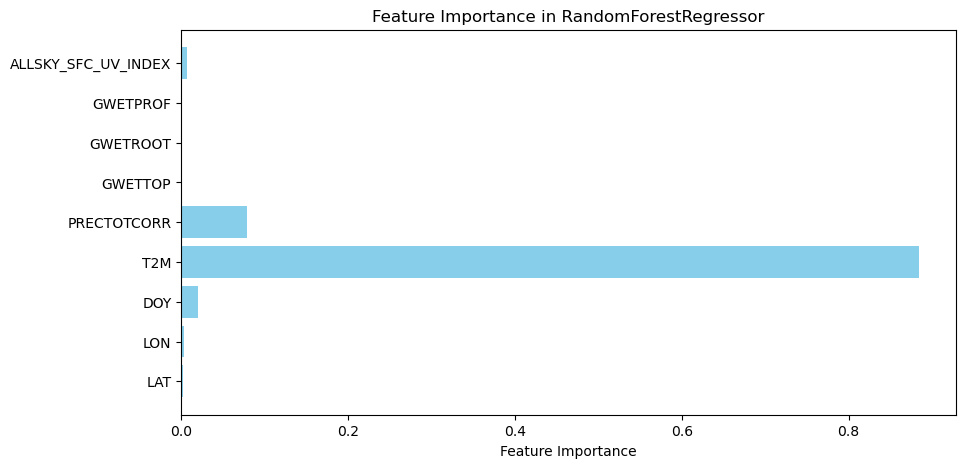

In [15]:
# Calculate feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in RandomForestRegressor')
plt.show()


In [19]:
# Predict high humidity 
df['Predicted_QV2M'] = rf_model.predict(X)

# Display the DataFrame with predictions
df


C:\Users\seled\AppData\Local\Temp\ipykernel_13308\1894612384.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LAT    LON  YEAR  DOY   T2M  QV2M  PRECTOTCORR  GWETTOP  GWETROOT  \
0     36.75 -79.75  2023  334  3.60  3.34         0.00     0.56      0.58   
1     36.75 -79.25  2023  334  3.66  3.36         0.00     0.57      0.59   
2     36.75 -78.75  2023  334  3.51  3.36         0.00     0.60      0.61   
3     36.75 -78.25  2023  334  3.50  3.43         0.00     0.61      0.63   
4     36.75 -77.75  2023  334  3.79  3.45         0.00     0.61      0.63   
...     ...    ...   ...  ...   ...   ...          ...      ...       ...   
9020  38.75 -79.75  2024  332  2.72  3.62         1.57     0.00      0.00   
9021  38.75 -79.25  2024  332  3.00  3.63         0.99     0.00      0.00   
9022  38.75 -78.75  2024  332  3.64  3.75         0.31     0.00      0.00   
9023  38.75 -78.25  2024  332  4.32  3.92         0.18     0.00      0.00   
9024  38.75 -77.75  2024  332  5.03  4.11         0.07     0.00      0.00   

      GWETPROF  ALLSKY_SFC_UV_INDEX Temperature_Level Humidity_Level  \
0         0.57                 0.45               Low            Low   
1         0.58                 0.45               Low            Low   
2         0.60                 0.45               Low            Low   
3         0.62                 0.45               Low            Low   
4         0.62                 0.44               Low            Low   
...        ...                  ...               ...            ...   
9020      0.00                 0.00               Low            Low   
9021      0.00                 0.00               Low            Low   
9022      0.00                 0.00               Low            Low   
9023      0.00                 0.00               Low            Low   
9024      0.00                 0.00               Low            Low   

      Predicted_QV2M  
0             3.2903  
1             3.3146  
2             3.3584  
3             3.3658  
4             3.4512  
...              ...  
9020          3.6720  
9021          3.6861  
9022          3.7285  
9023          4.1042  
9024          4.1923  

[9025 rows x 14 columns]

In [26]:
# Features and new target
X = df[['LAT', 'LON', 'DOY', 'T2M', 'PRECTOTCORR', 'GWETTOP', 'QV2M', 'GWETPROF', 'ALLSKY_SFC_UV_INDEX']]
y_gwetroot = df['GWETROOT']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_gwetroot, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gwetroot = rf_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gwetroot))
print("R² Score:", r2_score(y_test, y_pred_gwetroot))


Mean Squared Error: 1.5102149584487726e-05
R² Score: 0.9998958698417773


In [27]:
# Predict GWETROOT
df['Predicted_GWETROOT'] = rf_model.predict(X)

print(df)


        LAT    LON  YEAR  DOY   T2M  QV2M  PRECTOTCORR  GWETTOP  GWETROOT  \
0     36.75 -79.75  2023  334  3.60  3.34         0.00     0.56      0.58   
1     36.75 -79.25  2023  334  3.66  3.36         0.00     0.57      0.59   
2     36.75 -78.75  2023  334  3.51  3.36         0.00     0.60      0.61   
3     36.75 -78.25  2023  334  3.50  3.43         0.00     0.61      0.63   
4     36.75 -77.75  2023  334  3.79  3.45         0.00     0.61      0.63   
...     ...    ...   ...  ...   ...   ...          ...      ...       ...   
9020  38.75 -79.75  2024  332  2.72  3.62         1.57     0.00      0.00   
9021  38.75 -79.25  2024  332  3.00  3.63         0.99     0.00      0.00   
9022  38.75 -78.75  2024  332  3.64  3.75         0.31     0.00      0.00   
9023  38.75 -78.25  2024  332  4.32  3.92         0.18     0.00      0.00   
9024  38.75 -77.75  2024  332  5.03  4.11         0.07     0.00      0.00   

      GWETPROF  ALLSKY_SFC_UV_INDEX Temperature_Level Humidity_Level  \
0  

C:\Users\seled\AppData\Local\Temp\ipykernel_13308\3749679884.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



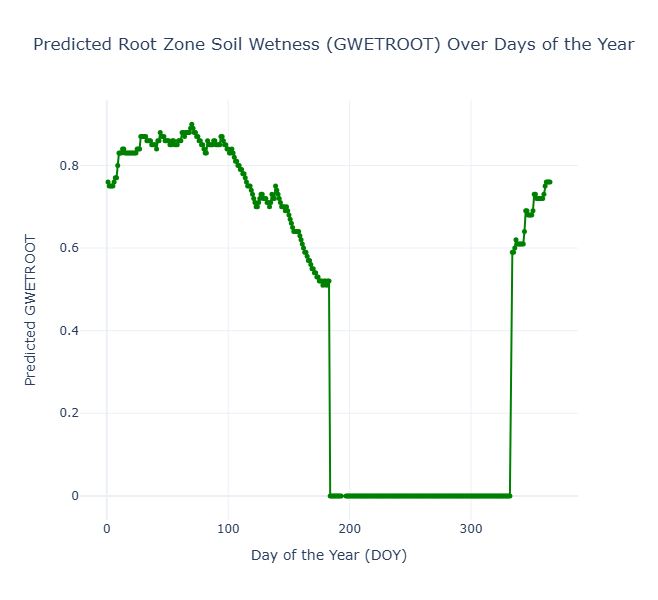

In [28]:
from scipy.ndimage import uniform_filter1d

# Average predicted GWETROOT
df_avg = df.groupby('DOY', as_index=False).agg({'Predicted_GWETROOT': 'mean'})

# Round
df_avg['Predicted_GWETROOT'] = df_avg['Predicted_GWETROOT'].round(2)

# Interactive time series
fig_time_series = go.Figure()

# Adding trace
fig_time_series.add_trace(go.Scatter(
    x=df_avg['DOY'],
    y=df_avg['Predicted_GWETROOT'],
    mode='lines+markers',
    line=dict(color='green', width=2),
    marker=dict(color='green', size=5),  # Reduced marker size
    name='Predicted GWETROOT'
))


# Parameters
fig_time_series.update_layout(
    title='Predicted Root Zone Soil Wetness (GWETROOT) Over Days of the Year',
    xaxis_title='Day of the Year (DOY)',
    yaxis_title='Predicted GWETROOT',
    hovermode='x',
    template='plotly_white',
    autosize=False,
    width=1200,  # Increased width
    height=600   # Increased height
)


fig_time_series.show()


In [29]:
# Threshold for excessive soil wetness
threshold = 0.7

# Filter data
saturated_areas = df[df['Predicted_GWETROOT'] > threshold]


In [30]:
# Split Features
X = df[['LAT', 'LON', 'DOY', 'GWETROOT', 'PRECTOTCORR', 'GWETTOP', 'QV2M', 'GWETPROF', 'ALLSKY_SFC_UV_INDEX']]
y_gwetroot = df['T2M']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_gwetroot, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gwetroot = rf_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gwetroot))
print("R² Score:", r2_score(y_test, y_pred_gwetroot))


Mean Squared Error: 0.4031340297396119
R² Score: 0.9949568993609075


In [31]:
# Predict T2M 
df['Predicted_T2M'] = rf_model.predict(df[['LAT', 'LON', 'DOY', 'GWETROOT', 'PRECTOTCORR', 'GWETTOP', 'QV2M', 'GWETPROF', 'ALLSKY_SFC_UV_INDEX']])
df

C:\Users\seled\AppData\Local\Temp\ipykernel_13308\1395873573.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LAT    LON  YEAR  DOY   T2M  QV2M  PRECTOTCORR  GWETTOP  GWETROOT  \
0     36.75 -79.75  2023  334  3.60  3.34         0.00     0.56      0.58   
1     36.75 -79.25  2023  334  3.66  3.36         0.00     0.57      0.59   
2     36.75 -78.75  2023  334  3.51  3.36         0.00     0.60      0.61   
3     36.75 -78.25  2023  334  3.50  3.43         0.00     0.61      0.63   
4     36.75 -77.75  2023  334  3.79  3.45         0.00     0.61      0.63   
...     ...    ...   ...  ...   ...   ...          ...      ...       ...   
9020  38.75 -79.75  2024  332  2.72  3.62         1.57     0.00      0.00   
9021  38.75 -79.25  2024  332  3.00  3.63         0.99     0.00      0.00   
9022  38.75 -78.75  2024  332  3.64  3.75         0.31     0.00      0.00   
9023  38.75 -78.25  2024  332  4.32  3.92         0.18     0.00      0.00   
9024  38.75 -77.75  2024  332  5.03  4.11         0.07     0.00      0.00   

      GWETPROF  ALLSKY_SFC_UV_INDEX Temperature_Level Humidity_Level  \
0         0.57                 0.45               Low            Low   
1         0.58                 0.45               Low            Low   
2         0.60                 0.45               Low            Low   
3         0.62                 0.45               Low            Low   
4         0.62                 0.44               Low            Low   
...        ...                  ...               ...            ...   
9020      0.00                 0.00               Low            Low   
9021      0.00                 0.00               Low            Low   
9022      0.00                 0.00               Low            Low   
9023      0.00                 0.00               Low            Low   
9024      0.00                 0.00               Low            Low   

      Predicted_QV2M  Predicted_GWETROOT  Predicted_T2M  
0             3.2903              0.5803         3.0842  
1             3.3146              0.5902         3.4399  
2             3.3584              0.6111         3.4696  
3             3.3658              0.6328         3.5160  
4             3.4512              0.6332         3.6185  
...              ...                 ...            ...  
9020          3.6720              0.0000         2.6430  
9021          3.6861              0.0000         2.8352  
9022          3.7285              0.0000         3.5788  
9023          4.1042              0.0000         3.7689  
9024          4.1923              0.0000         4.5379  

[9025 rows x 16 columns]

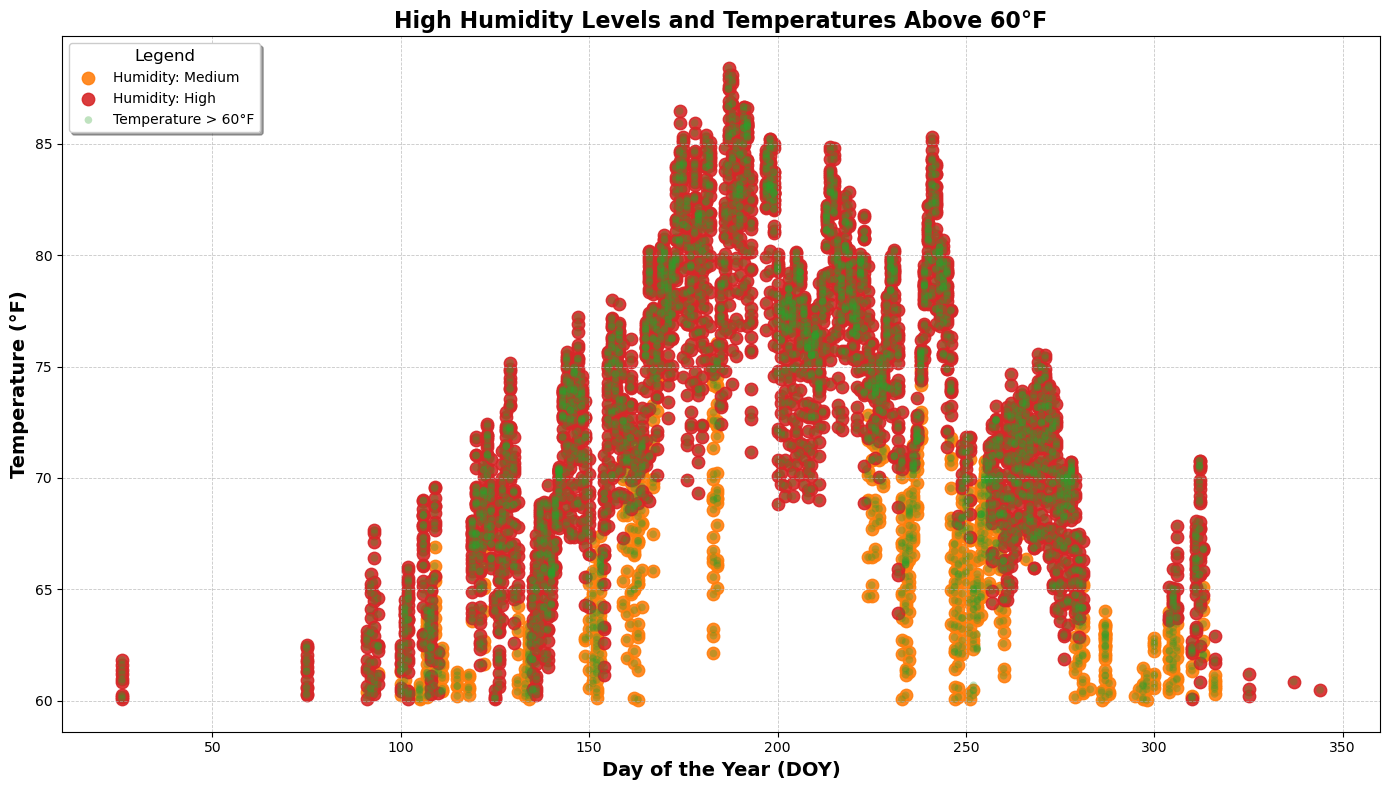

In [46]:

# Color map for humidity
color_map = {
    'Medium': '#ff7f0e',  # A warm orange for medium humidity
    'High': '#d62728'  # A bold red for high humidity
}

plt.figure(figsize=(14, 8))

# Scatter plot for humidity and color map
for level, color in color_map.items():
    level_df = filtered_df[filtered_df['Humidity_Level'] == level]
    plt.scatter(
        level_df['DOY'],
        level_df['Temperature_F'],
        color=color,
        label=f'Humidity: {level}',
        alpha=0.9,  # Higher opacity to highlight humidity
        s=80  # Larger marker size for emphasis
    )

# Plot for temperature and parameters
plt.scatter(
    filtered_df['DOY'],
    filtered_df['Temperature_F'],
    color='#2ca02c',  # A distinct green for temperature
    label='Temperature > 60°F',
    alpha=0.3,  # Reduced opacity to de-emphasize
    edgecolor='none',  # Removed edge to minimize visual noise
    s=30  # Smaller marker size
)

# Title and label
plt.xlabel('Day of the Year (DOY)', fontsize=14, fontweight='bold')
plt.ylabel('Temperature (°F)', fontsize=14, fontweight='bold')
plt.title('High Humidity Levels and Temperatures Above 60°F', fontsize=16, fontweight='bold')

# Legend
plt.legend(
    title='Legend', 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper left', 
    frameon=True, 
    shadow=True
)

# Gridlines
plt.grid(linestyle='--', linewidth=0.6, alpha=0.7)

plt.tight_layout()
plt.show()



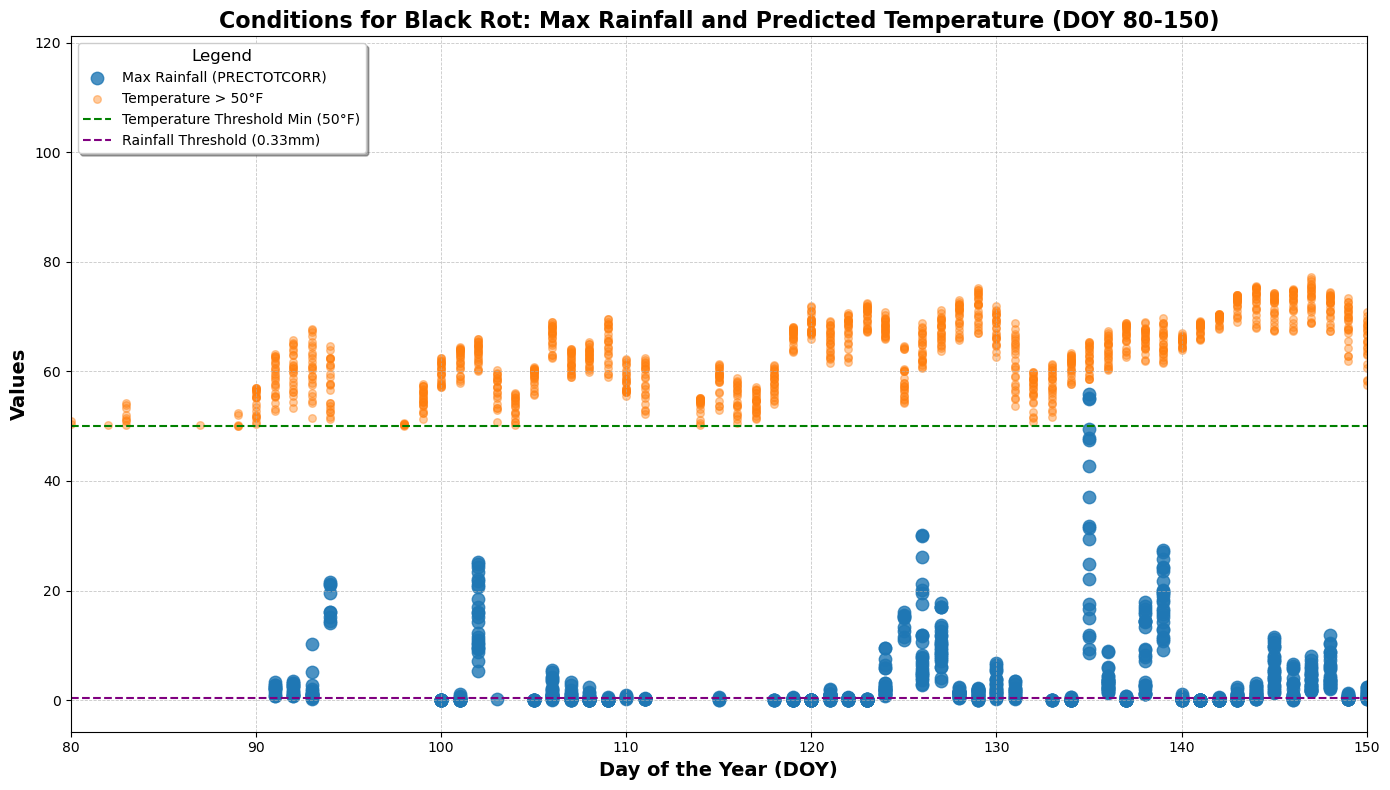

In [48]:

# Define constants for thresholds
temp_threshold_low = 50  
optimal_temp_fahrenheit = 80 
rainfall_threshold = 0.33 

plt.figure(figsize=(14, 8))

# Plot for max rainfall
plt.scatter(
    filtered_df['DOY'],
    filtered_df['PRECTOTCORR'],
    color='#1f77b4',  # Blue for rainfall
    label='Max Rainfall (PRECTOTCORR)',
    alpha=0.8,
    s=80  # Larger marker size for emphasis
)

# Plot for filtered temperature 
plt.scatter(
    df_filtered_temp['DOY'],
    df_filtered_temp['Temperature_F'],
    color='#ff7f0e',  # Orange for temperature
    label='Temperature > 50°F',
    alpha=0.4,
    s=30  # Smaller marker size to keep it subtle
)

# Temperature and thresholds
plt.axhline(
    y=temp_threshold_low,
    color='green',
    linestyle='--',
    label=f'Temperature Threshold Min (50°F)',
    linewidth=1.5
)

# Rainfall thresholds
plt.axhline(
    y=rainfall_threshold,
    color='purple',
    linestyle='--',
    label=f'Rainfall Threshold (0.33mm)',
    linewidth=1.5
)

# Labels and titles
plt.xlabel('Day of the Year (DOY)', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=14, fontweight='bold')
plt.title(
    'Conditions for Black Rot: Max Rainfall and Predicted Temperature (DOY 80-150)',
    fontsize=16,
    fontweight='bold'
)

# Legend
plt.legend(
    title='Legend',
    title_fontsize=12,
    fontsize=10,
    loc='upper left',
    frameon=True,
    shadow=True
)

# Visuals for gridlines
plt.grid(linestyle='--', linewidth=0.6, alpha=0.7)

# Filtering for days
plt.xlim(80, 150)

plt.tight_layout()
plt.show()



C:\Users\selena.c.mcquerrey\AppData\Local\Temp\ipykernel_25796\2932567612.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\selena.c.mcquerrey\AppData\Local\Temp\ipykernel_25796\2932567612.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



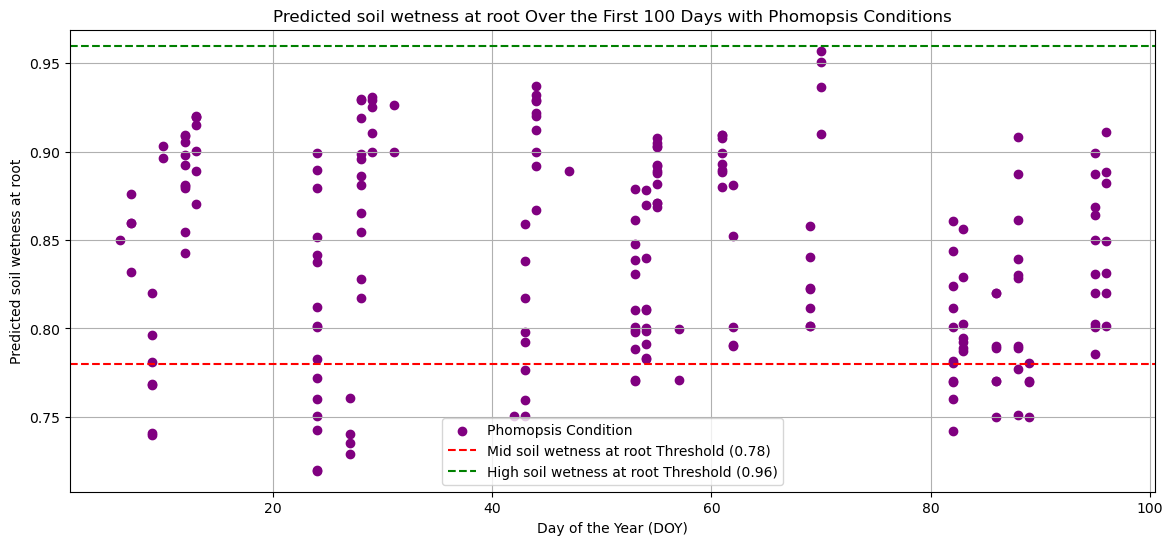

In [34]:

# Wetness theshold
mid_threshold = 0.78
high_threshold = 0.96
higher_threshold = 1.2 

# Temperature conditions
phomopsis_temp_min = 40 
phomopsis_temp_max = 45  
rain_threshold = 0.1 

# Timeline filtering
df_first_100 = df[df['DOY'] <= 100]

# Predictions on thresholds
df_first_100['GWETROOT_Level'] = pd.cut(df_first_100['Predicted_GWETROOT'], 
                                        bins=[0.44, mid_threshold, high_threshold, higher_threshold], 
                                        labels=['Mid', 'High', 'Higher'], 
                                        right=False)

# Temperature conversions
df_first_100['Temperature_F'] = df_first_100['Predicted_T2M'] * 9/5 + 32

# filtering for conditions
phomopsis_condition = (df_first_100['Temperature_F'] >= phomopsis_temp_min) & \
                      (df_first_100['Temperature_F'] <= phomopsis_temp_max) & \
                      (df_first_100['PRECTOTCORR'] >= rain_threshold)

df_phomopsis_first_100 = df_first_100[phomopsis_condition]

# parameters and ploting 
plt.figure(figsize=(14, 6))
plt.scatter(df_phomopsis_first_100['DOY'], df_phomopsis_first_100['Predicted_GWETROOT'], color='purple', label='Phomopsis Condition')
plt.axhline(y=mid_threshold, color='red', linestyle='--', label='Mid soil wetness at root Threshold (0.78)')
plt.axhline(y=high_threshold, color='green', linestyle='--', label='High soil wetness at root Threshold (0.96)')
plt.xlabel('Day of the Year (DOY)')
plt.ylabel('Predicted soil wetness at root')
plt.title('Predicted soil wetness at root Over the First 100 Days with Phomopsis Conditions')
plt.legend()
plt.grid(True)
plt.show()
